<a href="https://colab.research.google.com/github/TeamHub2/Deep-Learning/blob/main/Poteto_disease_detection_using_vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.preprocessing import image

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
)
validation_datagen = image.ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
train = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Deep learning/poteto pic/Train 70%',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

validation = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Deep learning/poteto pic/Validation 15%',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

test = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Deep learning/poteto pic/Test15%',
    target_size = (224, 224),
    batch_size = 32,
    shuffle = False,
    class_mode = 'categorical'
)

Found 1506 images belonging to 3 classes.
Found 324 images belonging to 3 classes.
Found 322 images belonging to 3 classes.


In [ ]:
test.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [ ]:
VGG19 = tf.keras.applications.VGG19(
    include_top=False, 
    weights = 'imagenet', 
    input_shape=(224,224,3),
    )

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
VGG19.trainable = False

In [ ]:
model = tf.keras.models.Sequential([
  VGG19,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax'), 
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1539      
Total params: 46,241,859
Trainable params: 26,217,475
Non-trainable params: 20,024,384
___________________________________

In [ ]:
history = model.fit(
    x = train, 
    validation_data = validation,
    epochs = 5
)



Epoch 1/5
48/48 [==============================] - 785s 16s/step - loss: 2.2232 - accuracy: 0.5930 - val_loss: 0.3691 - val_accuracy: 0.8735
Epoch 2/5
48/48 [==============================] - 29s 601ms/step - loss: 0.4085 - accuracy: 0.8440 - val_loss: 0.2788 - val_accuracy: 0.8951
Epoch 3/5
48/48 [==============================] - 29s 600ms/step - loss: 0.3599 - accuracy: 0.8685 - val_loss: 0.3234 - val_accuracy: 0.8704
Epoch 4/5
48/48 [==============================] - 29s 599ms/step - loss: 0.3514 - accuracy: 0.8572 - val_loss: 0.2910 - val_accuracy: 0.8735
Epoch 5/5
48/48 [==============================] - 29s 595ms/step - loss: 0.2938 - accuracy: 0.8878 - val_loss: 0.2155 - val_accuracy: 0.9228


In [ ]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

11/11 [==============================] - 119s 12s/step - loss: 0.1774 - accuracy: 0.9286
Accuracy: 0.9285714030265808
Loss: 0.17744137346744537


In [ ]:
import numpy as np
from sklearn import metrics

predictions = model.predict_generator(test)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test.classes
class_labels = ['Potato___Early_blight','Potato___Late_blight','Potato___healthy']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


                       precision    recall  f1-score   support

Potato___Early_blight       0.98      0.93      0.96       150
 Potato___Late_blight       0.90      0.97      0.93       150
     Potato___healthy       0.82      0.64      0.72        22

             accuracy                           0.93       322
            macro avg       0.90      0.85      0.87       322
         weighted avg       0.93      0.93      0.93       322



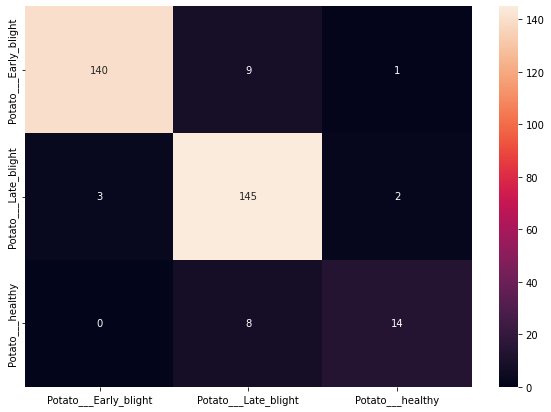

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in ['Potato___Early_blight','Potato___Late_blight','Potato___healthy']],
                  columns = [i for i in ['Potato___Early_blight','Potato___Late_blight','Potato___healthy']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')